In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict
from Bio import SeqIO
import glob


sns.set_theme(style="white")
sns.set_context("talk")


def get_longest_occurrence(string):
    # Initialize dictionary to keep track of maximum consecutive occurrence of each character
    max_occurrences = {}
    
    # Iterate over the characters in the string
    i = 0
    while i < len(string):
        char = string[i]
        count = 1
        
        # Check if there are consecutive occurrences of the current character
        while i+1 < len(string) and string[i+1] == char:
            count += 1
            i += 1
        
        # Update the maximum consecutive occurrence for the current character
        if char in max_occurrences:
            max_occurrences[char] = max(max_occurrences[char], count)
        else:
            max_occurrences[char] = count
        
        i += 1
        
    # Create a Pandas DataFrame from the dictionary
    df = pd.DataFrame({'c': list(max_occurrences.keys()), 'n': list(max_occurrences.values())})
    
    return df

def get_occurrences(file):
    fasta_sequences = SeqIO.parse(open(file),'fasta')
    fam = file.split("/")[-2]
    str_source = file.split("/")[-3]
    dataset = file.split("/")[-6]
    for fasta in fasta_sequences:
        name, sequence = fasta.id, str(fasta.seq)
        entry = get_longest_occurrence(sequence)
        entry["family"] = fam
        entry["seq_name"] = name
        entry["length"] = len(sequence)
        entry["str_source"] = str_source
        entry["dataset"] = dataset
        entry["source"] = str(dataset)+" - "+ str(str_source)
    return(entry)

In [ ]:
# 1. extract reference names
# 2. onlu retain sequences with those names 

In [2]:
ref_fasta_files = glob.glob("/home/luisasantus/Desktop/crg_cluster/data/structural_regression/homfam/refs/*.fa")

In [3]:
def get_ids(fasta_file):
    fasta_sequences = SeqIO.parse(open(fasta_file),'fasta')
    names = []
    summary = pd.DataFrame()
    fam = os.path.basename(fasta_file).replace(".fa", "")
    for fasta in fasta_sequences:
        name, sequence = fasta.id, str(fasta.seq)
        entry = pd.DataFrame([{ "family": fam, "seq_name": name}])
        summary = pd.concat([summary,entry], ignore_index=True)
    return(summary)

summary = pd.DataFrame()
for fasta_file in ref_fasta_files:
    summary = pd.concat([summary,get_ids(fasta_file)], ignore_index=True)

ref_names = list(summary.seq_name)

In [4]:
files = glob.glob("/home/luisasantus/Desktop/crg_cluster/data/structures_collections/*/DB/foldseek/AF2_PRED/ins/*")
files[1:10]

['/home/luisasantus/Desktop/crg_cluster/data/structures_collections/homfam_ref/DB/foldseek/AF2_PRED/ins/Q28787_PAPHA_1-24',
 '/home/luisasantus/Desktop/crg_cluster/data/structures_collections/homfam_ref/DB/foldseek/AF2_PRED/ins/Q5BVF2_CAVAP_27-50',
 '/home/luisasantus/Desktop/crg_cluster/data/structures_collections/homfam_ref/DB/foldseek/AF2_PRED/ins/INSL3_RAT_26-126',
 '/home/luisasantus/Desktop/crg_cluster/data/structures_collections/homfam_ref/DB/foldseek/AF2_PRED/ins/REL1_RAT_33-186',
 '/home/luisasantus/Desktop/crg_cluster/data/structures_collections/homfam_ref/DB/foldseek/AF2_PRED/ins/Q0P4T1_XENTR_37-199',
 '/home/luisasantus/Desktop/crg_cluster/data/structures_collections/homfam_ref/DB/foldseek/AF2_PRED/ins/BXB1_BOMMO_26-64',
 '/home/luisasantus/Desktop/crg_cluster/data/structures_collections/homfam_ref/DB/foldseek/AF2_PRED/ins/B1AAP7_LOXAF_31-187',
 '/home/luisasantus/Desktop/crg_cluster/data/structures_collections/homfam_ref/DB/foldseek/AF2_PRED/ins/BXA2_SAMCY_23-98',
 '/home/

In [5]:
# homfam
files = glob.glob("/home/luisasantus/Desktop/crg_cluster/data/structures_collections/homfam_ref/DB/foldseek/AF2_PRED/*/*")
summary_homfam = pd.DataFrame()
for file in files:
    seq_name = file.split("/")[-1]
    if seq_name in ref_names:
        summary_homfam = pd.concat([summary_homfam,get_occurrences(file)], ignore_index=True)
    
df_homfam = summary_homfam[["family", "c", "n", "seq_name", "source"]].groupby(["family","c"]).agg( 'max').reset_index().reset_index()
df_homfam.columns = df_homfam.columns.to_series().apply(''.join)

In [8]:
df_homfam[(df_homfam.c == "V") & (df_homfam.n > 10) ]

,index,family,c,n,seq_name,source
37,37,Ald,V,11,1n62b,homfam_ref - AF2_PRED
57,57,Ald_Xan_dh_2,V,11,1n62b,homfam_ref - AF2_PRED
153,153,HLH,V,31,1mdya,homfam_ref - AF2_PRED
963,963,hom,V,17,2hdda,homfam_ref - AF2_PRED
1473,1473,rhv,V,12,4rhv,homfam_ref - AF2_PRED
1912,1912,zf-CCHH,V,11,5znf,homfam_ref - AF2_PRED


In [6]:
# benchfam
files = glob.glob("/home/luisasantus/Desktop/crg_cluster/data/structural_regression/benchfam/DB/foldseek/PDB/*/*")
summary = pd.DataFrame()
for file in files:
    seq_name = file.split("/")[-1]
    summary = pd.concat([summary,get_occurrences(file)], ignore_index=True)
    
df = summary[["family", "c", "n", "seq_name", "source"]].groupby(["family","c"]).agg( 'max').reset_index().reset_index()
df.columns = df.columns.to_series().apply(''.join)

KeyboardInterrupt: 

In [ ]:
df_homfam

In [311]:
df_all = pd.concat([df,df_homfam])

[Text(0.5, 0, 'longest consecutive occurence'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'foldseek alphabet in Homfam (references only)')]

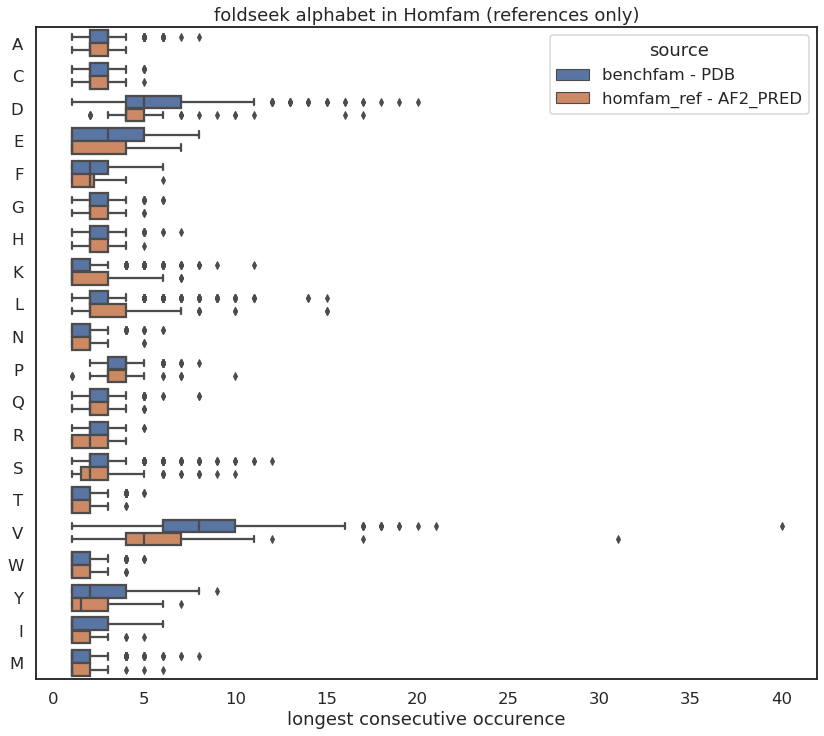

In [312]:
f, ax = plt.subplots(figsize=(14,12 ))
sns.boxplot(data = df_all, x = "n", y = "c", hue = "source")
ax.set(xlabel = "longest consecutive occurence", ylabel = "", title = "foldseek alphabet in Homfam (references only)")